#Menambahkan library

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


#Mengambil Data

In [62]:
df = pd.read_csv("mental-illnesses-prevalence.csv")

In [63]:
df

,Entity,Code,Year,Schizophrenia_disorders,Depressive_disorders,Anxiety_disorders,Bipolar_disorders,Eating_disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [64]:
df.head(10)

,Entity,Code,Year,Schizophrenia_disorders,Depressive_disorders,Anxiety_disorders,Bipolar_disorders,Eating_disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
5,Afghanistan,AFG,1995,0.219409,4.978228,4.668100,0.699768,0.108507
6,Afghanistan,AFG,1996,0.218465,4.981489,4.665759,0.699650,0.105269
7,Afghanistan,AFG,1997,0.217286,4.987593,4.665013,0.699597,0.101531
8,Afghanistan,AFG,1998,0.216074,4.996858,4.668240,0.699765,0.098050
9,Afghanistan,AFG,1999,0.215068,5.004257,4.673557,0.700054,0.095723


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6420.0,2004.500000,8.656116,1990.000000,1997.000000,2004.500000,2012.000000,2019.000000
Schizophrenia_disorders,6420.0,0.266604,0.039383,0.188416,0.242267,0.273477,0.286575,0.462045
Depressive_disorders,6420.0,3.767036,0.925286,1.522333,3.080036,3.636772,4.366252,7.645899
Anxiety_disorders,6420.0,4.101840,1.050543,1.879996,3.425846,3.939547,4.564164,8.624634
Bipolar_disorders,6420.0,0.636968,0.233391,0.181667,0.520872,0.579331,0.844406,1.506730
Eating_disorders,6420.0,0.195664,0.138380,0.044780,0.096416,0.144150,0.251167,1.031688


In [66]:
df.shape

(6420, 8)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   6420 non-null   object 
 1   Code                     6150 non-null   object 
 2   Year                     6420 non-null   int64  
 3   Schizophrenia_disorders  6420 non-null   float64
 4   Depressive_disorders     6420 non-null   float64
 5   Anxiety_disorders        6420 non-null   float64
 6   Bipolar_disorders        6420 non-null   float64
 7   Eating_disorders         6420 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 401.4+ KB


#Preprocessing

In [68]:
df.isnull().sum()

Entity                       0
Code                       270
Year                         0
Schizophrenia_disorders      0
Depressive_disorders         0
Anxiety_disorders            0
Bipolar_disorders            0
Eating_disorders             0
dtype: int64

In [69]:
df = df.drop(["Code"], axis=1)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   6420 non-null   object 
 1   Year                     6420 non-null   int64  
 2   Schizophrenia_disorders  6420 non-null   float64
 3   Depressive_disorders     6420 non-null   float64
 4   Anxiety_disorders        6420 non-null   float64
 5   Bipolar_disorders        6420 non-null   float64
 6   Eating_disorders         6420 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 351.2+ KB


In [71]:
df.isnull().sum()

Entity                     0
Year                       0
Schizophrenia_disorders    0
Depressive_disorders       0
Anxiety_disorders          0
Bipolar_disorders          0
Eating_disorders           0
dtype: int64

In [72]:
# Filter hanya data dari Indonesia
df_indonesia = df[df['Entity'] == 'Indonesia']

In [73]:
# Melakukan pengelompokkan berdasarkan entitas
df1 = df_indonesia.groupby(['Entity', 'Year']).first().reset_index()

In [74]:
df1

,Entity,Year,Schizophrenia_disorders,Depressive_disorders,Anxiety_disorders,Bipolar_disorders,Eating_disorders
0,Indonesia,1990,0.280833,2.434134,3.398064,0.331020,0.081623
1,Indonesia,1991,0.281928,2.422588,3.404563,0.331011,0.082828
2,Indonesia,1992,0.282912,2.412402,3.410624,0.330992,0.083908
3,Indonesia,1993,0.283738,2.403884,3.415783,0.330971,0.084859
4,Indonesia,1994,0.284362,2.397779,3.419655,0.330948,0.085637
5,Indonesia,1995,0.284738,2.394692,3.421891,0.330924,0.086203
6,Indonesia,1996,0.284910,2.393491,3.423420,0.330916,0.086512
7,Indonesia,1997,0.284982,2.392996,3.425396,0.330897,0.086892
8,Indonesia,1998,0.284988,2.392508,3.427276,0.330878,0.087053
9,Indonesia,1999,0.284969,2.392435,3.428572,0.330857,0.087256


In [75]:
df2 = df1.drop(["Entity"], axis=1)

#Exploratory Data Analist (EDA)

##scatter


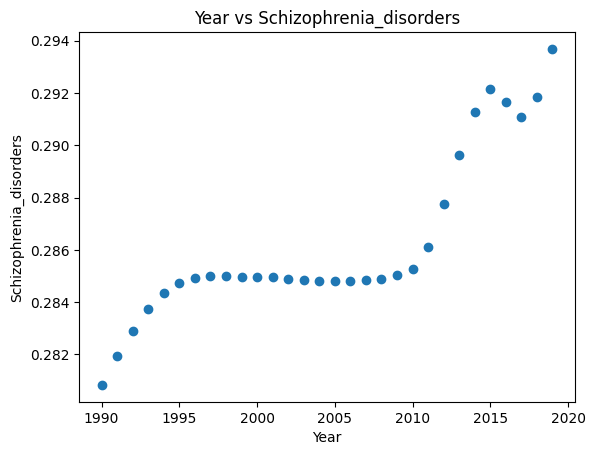

In [76]:
#Bivariate analysis Tahun dan pengidap Schizophrenia disorders.
#Menggunakan scatter plot.
plt.scatter(df2['Year'], df2['Schizophrenia_disorders'])
plt.xlabel('Year')
plt.ylabel('Schizophrenia_disorders')
plt.title('Year vs Schizophrenia_disorders')
plt.show()

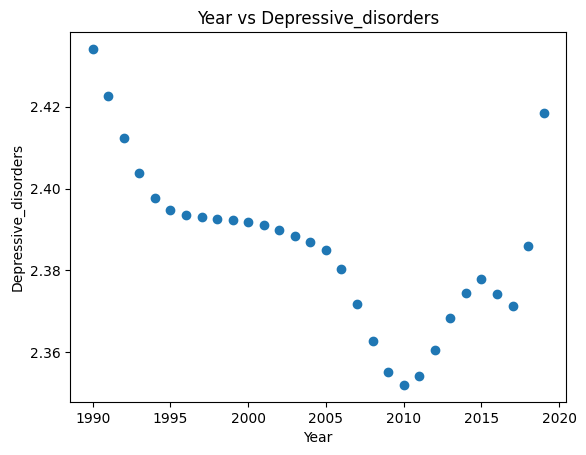

In [77]:
#Bivariate analysis Tahun dan pengidap Depressive disorders.
#Menggunakan scatter plot.
plt.scatter(df2['Year'], df2['Depressive_disorders'])
plt.xlabel('Year')
plt.ylabel('Depressive_disorders')
plt.title('Year vs Depressive_disorders')
plt.show()

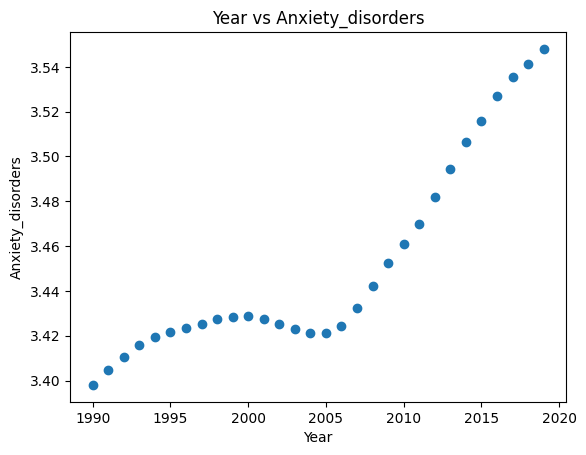

In [78]:
#Bivariate analysis Tahun dan pengidap Anxiety disorders.
#Menggunakan scatter plot.
plt.scatter(df2['Year'], df2['Anxiety_disorders'])
plt.xlabel('Year')
plt.ylabel('Anxiety_disorders')
plt.title('Year vs Anxiety_disorders')
plt.show()

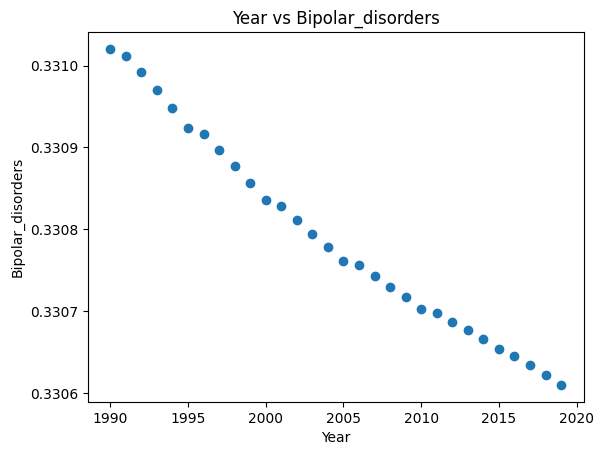

In [79]:
#Bivariate analysis Tahun dan Bipolar Disorder.
#Menggunakan scatter plot.
plt.scatter(df2['Year'], df2['Bipolar_disorders'])
plt.xlabel('Year')
plt.ylabel('Bipolar_disorders')
plt.title('Year vs Bipolar_disorders')
plt.show()

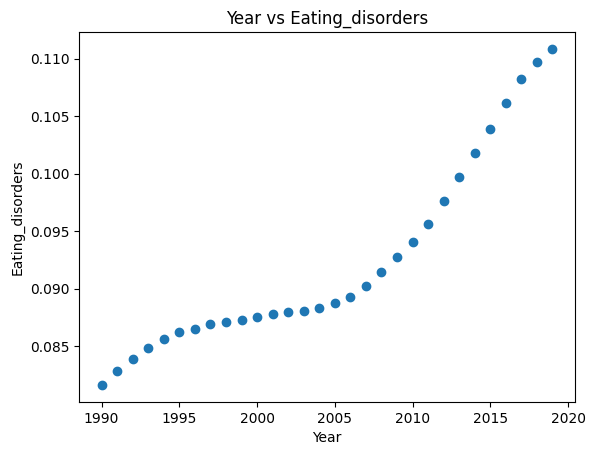

In [80]:
#Bivariate analysis Tahun dan pengidap Eating disorder.
#Menggunakan scatter plot.
plt.scatter(df2['Year'], df2['Eating_disorders'])
plt.xlabel('Year')
plt.ylabel('Eating_disorders')
plt.title('Year vs Eating_disorders')
plt.show()

##korelasi

In [81]:
df2.corr()

,Year,Schizophrenia_disorders,Depressive_disorders,Anxiety_disorders,Bipolar_disorders,Eating_disorders
Year,1.000000,0.870221,-0.631472,0.900515,-0.992143,0.930962
Schizophrenia_disorders,0.870221,1.000000,-0.319166,0.967075,-0.826256,0.964010
Depressive_disorders,-0.631472,-0.319166,1.000000,-0.372219,0.684888,-0.398118
Anxiety_disorders,0.900515,0.967075,-0.372219,1.000000,-0.846721,0.994544
Bipolar_disorders,-0.992143,-0.826256,0.684888,-0.846721,1.000000,-0.884087
Eating_disorders,0.930962,0.964010,-0.398118,0.994544,-0.884087,1.000000


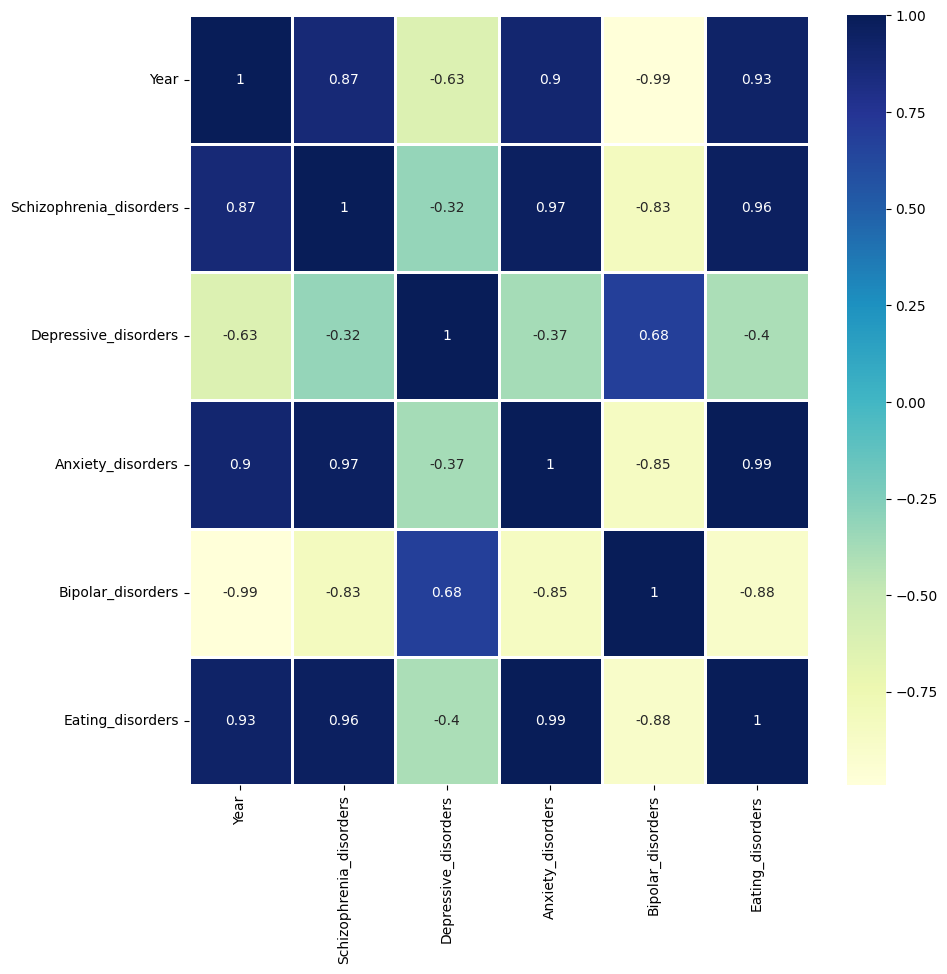

In [82]:
#correlation matrix graph

df_correlation = df2.corr()

fig, ax= plt.subplots(figsize=(10,10))

ax= sns.heatmap(df_correlation, annot= True, linewidths= 2, cmap="YlGnBu")

#Modeling

##Load dataset

In [83]:
x = df2[['Year']]
y = df2[['Schizophrenia_disorders',	'Depressive_disorders',	'Anxiety_disorders',	'Bipolar_disorders',	'Eating_disorders']]

##spliting data

In [84]:

#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#checking the shape
print('Shape of X_train :', x_train.shape)
print('Shape of Y_train :', y_train.shape)
print('Shape of X_test :', x_test.shape)
print('Shape of Y_test :', y_test.shape)

#import regressor from scikit-learn
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf = rf.fit(x_train, y_train)

Y_pred = rf.predict(x_test)

Shape of X_train : (21, 1)
Shape of Y_train : (21, 5)
Shape of X_test : (9, 1)
Shape of Y_test : (9, 5)


In [85]:
Y_pred

array([[0.28220262, 2.41977114, 3.4062872 , 0.33100399, 0.08313746],
       [0.29276651, 2.40247825, 3.53348997, 0.33062852, 0.10777486],
       [0.284869  , 2.38857455, 3.42404733, 0.33079876, 0.08810287],
       [0.28496725, 2.39224599, 3.42771834, 0.33085999, 0.08725102],
       [0.29145546, 2.37705104, 3.51115389, 0.33065812, 0.10298961],
       [0.29001632, 2.36972983, 3.49813651, 0.33067217, 0.10047423],
       [0.29210303, 2.38507839, 3.51971453, 0.33064745, 0.10476821],
       [0.28491747, 2.39052439, 3.42588992, 0.33082554, 0.08772319],
       [0.28484067, 2.3763204 , 3.42884589, 0.33075001, 0.08976971]])

#Evaluasi

Mean squared error of testing set: 2.8050065035170836e-05
Root Mean Squeared error of testing set: 0.005296231210509114
R-squared  of testing set: 0.8991588169157609


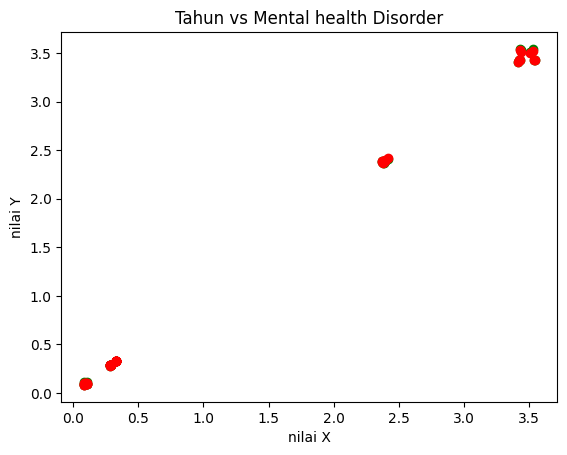

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, Y_pred)
print('Mean squared error of testing set:', mse)
#calculating Rmse
rmse = np.sqrt(mse)
print('Root Mean Squeared error of testing set:', rmse)
#calculating R2, higher value better. 1 means perfect prediction
r2 = r2_score(y_test, Y_pred)
print('R-squared  of testing set:', r2)

#plotting y_test dan Y_pred
plt.scatter(y_test.sort_index(), y_test, c = 'green')
plt.scatter(y_test.sort_index(), Y_pred, c = 'red')
plt.xlabel('nilai X')
plt.ylabel('nilai Y')
plt.title('Tahun vs Mental health Disorder')
plt.show()

In [87]:
import pickle
pickle.dump(rf, open("modelrf1.pkl", "wb"))

time_series_model = pickle.load(open('modelrf1.pkl', 'rb'))